- 내부 sales 촉진 프로젝트와 맞물려 upselling opportunity 기획
- Market Basket 분석 자체는 문제 없으나, 뻔한 결과가 자주 도출됨에 따라 매뉴얼 작업이 불가피하였음
- 아래 코드는 참조용

In [1]:
import pandas as pd

In [2]:
rd = pd.read_csv('c:/users/chpar10/downloads/Created isell orders details (CRE06)_ytd.csv')
rd.shape

c:\users\chpar10\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (10,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(1048575, 21)

___
- 2개 이상 구매 order number만 분석 대상
> 1. 2개 이상 구매한 Order Number 추출
> 2. 2개 이상 구매로 rd 재구성

In [63]:
idx = rd.groupby('Order Number', as_index=False)['Country'].count()
idx= idx[idx['Country']>1]
idx = [i for i in idx['Order Number']]

In [3]:
def search_func(row):
    if row["Order Number"] in idx:    
        return "Yes"
    else:
        return "No"

In [65]:
rd['Match'] = rd.apply(search_func, axis=1)

In [67]:
new_rd = rd[rd['Match'] == 'Yes']

In [74]:
new_rd = new_rd.loc[:,['Creation Date', 'Order Number', 'Article No', 'Article Name', 'HFB', 'Quantity', 'Goods Value']]
#new_rd.to_csv('Cre06(singleOrderFiltered).csv', index=False)

___
- 키친 HFB7, 화장실 HFB6 추가?삭제 검토 필요

In [2]:
rd = pd.read_csv('c:/users/chpar10/downloads/Cre06(singleOrderFiltered).csv')
rd.head()

c:\users\chpar10\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Creation Date  Order Number  Article No              Article Name  HFB  \
0    2019-11-30     162845036    80278579         HYLLIS 휠리스 - 선반유닛   17   
1    2019-11-30     162847059    50245849           BESTÅ 베스토 - 프레임    2   
2    2019-11-30     162837991    10442192  TONSÄTTA 톤세타 꽃병 21 블루 AP   16   
3    2019-11-30     162837515    50422328     IVAR 이바르 옷장R 83x50 AP   17   
4    2019-11-30     162847260    50320570   LÅNGFJÄLL 팔걸이 화이트 AP JP    3   

  Quantity Goods Value  
0        3   44,132.01  
1        1      34,803  
2        1      12,900  
3        5      75,000  
4        1      20,000

In [58]:
def remove_hfb(row):
    out=True
    if row['HFB']==7:
        out=False
    if row['HFB']==6:
        out=False
    return out

In [59]:
rd['match'] = rd.apply(remove_hfb, axis=1)

In [60]:
test_set = rd[rd['match']==True]
test_set.head()

Country  Store Creation Date Creation Time  Order Number  Order Type  \
0      KR    539    2019-11-30         20:29     162845036        ISOM   
1      KR    539    2019-11-30         22:01     162847059        ISOM   
2      KR    539    2019-11-30         15:13     162837991        ISOM   
4      KR    373    2019-11-30         15:05     162837515  SALESORDER   
5      KR    522    2019-11-30         22:13     162847260  SALESORDER   

   Article No              Article Name  HFB    PA  ... Price Per Piece  \
0    80278579         HYLLIS 휠리스 - 선반유닛   17  1714  ...       14,710.67   
1    50245849           BESTÅ 베스토 - 프레임    2   211  ...          34,803   
2    10442192  TONSÄTTA 톤세타 꽃병 21 블루 AP   16  1633  ...          12,900   
4    50422328     IVAR 이바르 옷장R 83x50 AP   17  1714  ...          15,000   
5    50320570   LÅNGFJÄLL 팔걸이 화이트 AP JP    3   352  ...          20,000   

  Goods Value VAT amount/for goods value         Status Customer Type  \
0   44,132.01                      4,012    205/Pending       PRIVATE   
1      34,803                   3,163.91  700/Completed       PRIVATE   
2      12,900                   1,172.73     250/Placed       PRIVATE   
4      75,000                   6,818.18  700/Completed       PRIVATE   
5      20,000                   1,818.18  700/Completed       PRIVATE   

  Sales Item Id Family Number Order Method Client System match  
0             4           NaN     INTERNET           ICP  True  
1            24           NaN     INTERNET           ICP  True  
2             1           NaN     INTERNET           ICP  True  
4             7           NaN        STORE         ISELL  True  
5             8           NaN        STORE         ISELL  True  

[5 rows x 22 columns]

In [61]:
tmp1 = test_set[test_set.HFB==18].reset_index(drop=True)
tmp2 = test_set[test_set.HFB==9].reset_index(drop=True)

In [62]:
idx = pd.unique(pd.concat([tmp1,tmp2])['Order Number'])

In [63]:
test_set['match'] = test_set.apply(search_func, axis=1)

c:\users\chpar10\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [64]:
testSet = test_set[test_set.match=='Yes']

In [7]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [65]:
testSet = testSet.loc[:,['Article No', 'Order Number', 'Quantity']]
testSet.Quantity = [int(1) for i in testSet.Quantity]
testSet.Quantity.astype(int)

testSet = testSet.drop_duplicates()
testSet

Article No  Order Number  Quantity
0          80278579     162845036         1
9          90469960     162841999         1
12         70147758     162754488         1
16         30374352     162829778         1
19         40240404     162721741         1
22         20309550     162839444         1
27         40301708     162835469         1
35         60368731     162843735         1
43         10356311     162846822         1
44         40165466     162826161         1
46         90424354     154309299         1
49           365014     162846094         1
52         30339523     162824813         1
53         90405765     162847027         1
54         20169074     162846026         1
58         90365364     162836499         1
60         30157235     162847526         1
61         50387264     162847526         1
62         40169450     162838947         1
68         20160950     162829778         1
71         60402198     162846545         1
83         40301708     162834720         1
88         60386749     162845227         1
93         10351568     161671572         1
94         50256890     161671572         1
97         60168529     162847084         1
98         70288239     162847084         1
99         70320814     162831477         1
100        90272336     162831295         1
103        40322174     157412473         1
...             ...           ...       ...
1048474      302696     155111185         1
1048475    50328825     155119362         1
1048480    40174507     155115982         1
1048481    30355730     155111185         1
1048483    40351312     155110725         1
1048486    80350909     155111360         1
1048488    60394476     155111185         1
1048489    40301708     155123555         1
1048491    80166906     155110725         1
1048496    90326202     155111185         1
1048499    20172444     155119362         1
1048500    60162301     155119362         1
1048502    20262005     155111185         1
1048505    90251046     155110725         1
1048506      357311     155115982         1
1048508    30160964     155111360         1
1048511    50403023     155111185         1
1048512      313322     155111185         1
1048514    10373589     155109356         1
1048518    80377070     155108009         1
1048527    40174507     155093155         1
1048542    70316181     155097784         1
1048547    40387033     155097259         1
1048559    40301708     155093155         1
1048560    90185594     155097784         1
1048563    20385389     155097259         1
1048564    40385289     155093155         1
1048565    40167856     155093150         1
1048570    60324073     155093150         1
1048571    70345961     155108009         1

[398826 rows x 3 columns]

In [74]:
testSet = testSet.reset_index(drop=True)

In [108]:
idx = pd.unique(testSet['Order Number'])
idx

array([162845036, 162841999, 162754488, ..., 155097784, 155097259,
       155093150], dtype=int64)

In [109]:
idx = pd.DataFrame(idx).sample(n=int(len(idx)/3))

idx = [i for i in idx[0]]

In [110]:
pd.unique(testSet['Order Number']).shape

(108742,)

In [111]:
len(idx)

36247

In [112]:
testSet['match'] = testSet.apply(search_func, axis=1)

In [113]:
testSet

Article No  Order Number  Quantity match
0         80278579     162845036         1    No
1         90469960     162841999         1    No
2         70147758     162754488         1   Yes
3         30374352     162829778         1   Yes
4         40240404     162721741         1   Yes
5         20309550     162839444         1   Yes
6         40301708     162835469         1   Yes
7         60368731     162843735         1    No
8         10356311     162846822         1    No
9         40165466     162826161         1    No
10        90424354     154309299         1   Yes
11          365014     162846094         1    No
12        30339523     162824813         1   Yes
13        90405765     162847027         1    No
14        20169074     162846026         1    No
15        90365364     162836499         1    No
16        30157235     162847526         1   Yes
17        50387264     162847526         1   Yes
18        40169450     162838947         1    No
19        20160950     162829778         1   Yes
20        60402198     162846545         1    No
21        40301708     162834720         1    No
22        60386749     162845227         1    No
23        10351568     161671572         1   Yes
24        50256890     161671572         1   Yes
25        60168529     162847084         1   Yes
26        70288239     162847084         1   Yes
27        70320814     162831477         1    No
28        90272336     162831295         1    No
29        40322174     157412473         1   Yes
...            ...           ...       ...   ...
398796      302696     155111185         1    No
398797    50328825     155119362         1   Yes
398798    40174507     155115982         1    No
398799    30355730     155111185         1    No
398800    40351312     155110725         1    No
398801    80350909     155111360         1   Yes
398802    60394476     155111185         1    No
398803    40301708     155123555         1    No
398804    80166906     155110725         1    No
398805    90326202     155111185         1    No
398806    20172444     155119362         1   Yes
398807    60162301     155119362         1   Yes
398808    20262005     155111185         1    No
398809    90251046     155110725         1    No
398810      357311     155115982         1    No
398811    30160964     155111360         1   Yes
398812    50403023     155111185         1    No
398813      313322     155111185         1    No
398814    10373589     155109356         1   Yes
398815    80377070     155108009         1    No
398816    40174507     155093155         1    No
398817    70316181     155097784         1    No
398818    40387033     155097259         1   Yes
398819    40301708     155093155         1    No
398820    90185594     155097784         1    No
398821    20385389     155097259         1   Yes
398822    40385289     155093155         1    No
398823    40167856     155093150         1   Yes
398824    60324073     155093150         1   Yes
398825    70345961     155108009         1    No

[398826 rows x 4 columns]

In [115]:
new_ts = testSet[testSet.match!='Yes']

In [119]:
new_ts.shape

(266148, 4)

In [116]:
test_matrix = new_ts.groupby(['Order Number', 'Article No'])['Quantity'].count().unstack().reset_index().fillna(0).set_index('Order Number')

In [ ]:
test_result = apriori(test_matrix, min_support = 0.0005, use_colnames=True, max_len=2, low_memory=True)
test_result

In [ ]:
association_rules(test_result, metric = 'lift', min_threshold=1)

In [121]:
association_rules(test_result, metric = 'lift', min_threshold=1).to_csv('association_hfb9,18(vs2).csv', index=False)

___
## by PA

In [4]:
rd_set = rd.loc[:,['PA', 'Order Number', 'Quantity']]
rd_set.Quantity = [int(1) for i in rd_set.Quantity]
rd_set.Quantity.astype(int)

rd_set = rd_set.drop_duplicates()
rd_set

PA  Order Number  Quantity
0        1714     162845036         1
1         211     162847059         1
2        1633     162837991         1
3         782     162843240         1
4        1714     162837515         1
5         352     162847260         1
6         423     162844464         1
7         343     162838826         1
8         611     162836796         1
9         942     162841999         1
10       1431     162821527         1
11        511     162840555         1
12       1832     162754488         1
13       1431     162844876         1
14       1211     162845020         1
15        782     162828984         1
16       1831     162829778         1
17        521     162837822         1
18        421     162845814         1
19       1832     162721741         1
20        422     162844548         1
21        422     162845850         1
22       1831     162839444         1
23        511     162846418         1
24        422     162830977         1
25       1311     162845176         1
26        216     162843517         1
27       1853     162835469         1
28       1214     162845659         1
29        612     162838003         1
...       ...           ...       ...
1048536   212     155069973         1
1048537  1311     155109978         1
1048540  1211     155109978         1
1048541   612     155108255         1
1048542  1851     155097784         1
1048543   523     155094218         1
1048544  1543     155093095         1
1048545  1031     155100139         1
1048546   121     155103173         1
1048547   942     155097259         1
1048548  2045     155101564         1
1048550  1012     155109992         1
1048551   212     155093132         1
1048552   782     155109978         1
1048553  1011     155109992         1
1048555  1415     155092236         1
1048556  1232     155095366         1
1048559  1853     155093155         1
1048560  1831     155097784         1
1048561  1211     155098342         1
1048562  1643     155095366         1
1048564  1431     155093155         1
1048565   945     155093150         1
1048566   423     155104347         1
1048567   623     155096181         1
1048568  1551     155109976         1
1048571  1011     155108009         1
1048572   762     155093155         1
1048573   821     155102788         1
1048574  2041     155101564         1

[798807 rows x 3 columns]

In [5]:
test_set = rd_set.groupby(['Order Number', 'PA'])['Quantity'].count().unstack().reset_index().fillna(0).set_index('Order Number')

In [9]:
test_result = apriori(test_set, min_support = 0.00001, use_colnames=True, max_len=2, low_memory=True)
test_result

support      itemsets
0      0.032327         (111)
1      0.012586         (113)
2      0.033775         (121)
3      0.023582         (125)
4      0.011659         (126)
5      0.029863         (211)
6      0.012160         (212)
7      0.000718         (213)
8      0.027171         (214)
9      0.030200         (215)
10     0.008314         (216)
11     0.005185         (221)
12     0.016529         (231)
13     0.044621         (341)
14     0.012349         (342)
15     0.022337         (343)
16     0.008980         (351)
17     0.010330         (352)
18     0.003564         (353)
19     0.008877         (361)
20     0.024044         (421)
21     0.028933         (422)
22     0.011689         (423)
23     0.005535         (424)
24     0.033533         (431)
25     0.010470         (432)
26     0.010976         (433)
27     0.002272         (434)
28     0.041758         (511)
29     0.001465         (512)
...         ...           ...
14469  0.000028  (2044, 1862)
14470  0.000045  (2045, 1862)
14471  0.000270  (1912, 1911)
14472  0.000017  (1921, 1911)
14473  0.000674  (1922, 1911)
14474  0.000019  (2041, 1911)
14475  0.000014  (2042, 1911)
14476  0.000014  (2044, 1911)
14477  0.000028  (2045, 1911)
14478  0.000351  (1912, 1922)
14479  0.000014  (1912, 2041)
14480  0.000019  (1912, 2042)
14481  0.000039  (1921, 1922)
14482  0.000061  (2041, 1922)
14483  0.000078  (1922, 2042)
14484  0.000019  (1922, 2043)
14485  0.000081  (1922, 2044)
14486  0.000075  (1922, 2045)
14487  0.000298  (2041, 2042)
14488  0.000086  (2041, 2043)
14489  0.000223  (2041, 2044)
14490  0.000220  (2041, 2045)
14491  0.000148  (2042, 2043)
14492  0.000276  (2042, 2044)
14493  0.000365  (2042, 2045)
14494  0.000123  (2043, 2044)
14495  0.000109  (2043, 2045)
14496  0.000317  (2044, 2045)
14497  0.000042  (7014, 7015)
14498  0.000033  (7092, 7015)

[14499 rows x 2 columns]

In [11]:
association_rules(test_result, metric = 'lift', min_threshold=4)

antecedents consequents  antecedent support  consequent support  \
0          (125)       (126)            0.023582            0.011659   
1          (126)       (125)            0.011659            0.023582   
2         (1713)       (125)            0.001796            0.023582   
3          (125)      (1713)            0.023582            0.001796   
4          (211)       (231)            0.029863            0.016529   
5          (231)       (211)            0.016529            0.029863   
6          (212)       (221)            0.012160            0.005185   
7          (221)       (212)            0.005185            0.012160   
8          (213)       (221)            0.000718            0.005185   
9          (221)       (213)            0.005185            0.000718   
10         (213)       (711)            0.000718            0.005836   
11         (711)       (213)            0.005836            0.000718   
12         (721)       (213)            0.006070            0.000718   
13         (213)       (721)            0.000718            0.006070   
14         (731)       (213)            0.006187            0.000718   
15         (213)       (731)            0.000718            0.006187   
16         (213)       (741)            0.000718            0.001952   
17         (741)       (213)            0.001952            0.000718   
18         (213)      (1645)            0.000718            0.012224   
19        (1645)       (213)            0.012224            0.000718   
20         (213)      (7015)            0.000718            0.000551   
21        (7015)       (213)            0.000551            0.000718   
22         (216)       (434)            0.008314            0.002272   
23         (434)       (216)            0.002272            0.008314   
24         (216)       (783)            0.008314            0.001195   
25         (783)       (216)            0.001195            0.008314   
26         (216)      (1046)            0.008314            0.005165   
27        (1046)       (216)            0.005165            0.008314   
28         (216)      (1644)            0.008314            0.004734   
29        (1644)       (216)            0.004734            0.008314   
...          ...         ...                 ...                 ...   
1880      (1912)      (1862)            0.006090            0.005048   
1881      (1862)      (1912)            0.005048            0.006090   
1882      (1921)      (1911)            0.000228            0.014042   
1883      (1911)      (1921)            0.014042            0.000228   
1884      (1921)      (1922)            0.000228            0.018230   
1885      (1922)      (1921)            0.018230            0.000228   
1886      (2041)      (2042)            0.001737            0.002762   
1887      (2042)      (2041)            0.002762            0.001737   
1888      (2041)      (2043)            0.001737            0.000780   
1889      (2043)      (2041)            0.000780            0.001737   
1890      (2041)      (2044)            0.001737            0.001910   
1891      (2044)      (2041)            0.001910            0.001737   
1892      (2041)      (2045)            0.001737            0.002587   
1893      (2045)      (2041)            0.002587            0.001737   
1894      (2042)      (2043)            0.002762            0.000780   
1895      (2043)      (2042)            0.000780            0.002762   
1896      (2042)      (2044)            0.002762            0.001910   
1897      (2044)      (2042)            0.001910            0.002762   
1898      (2042)      (2045)            0.002762            0.002587   
1899      (2045)      (2042)            0.002587            0.002762   
1900      (2043)      (2044)            0.000780            0.001910   
1901      (2044)      (2043)            0.001910            0.000780   
1902      (2043)      (2045)            0.000780            0.002587   
1903      (2045)      (2043)            0.002

In [12]:
association_rules(test_result, metric = 'lift', min_threshold=1).to_csv('association_pa2.csv', index=False)

In [13]:
rd_set = rd.loc[:,['HFB', 'Order Number', 'Quantity']]
rd_set.Quantity = [int(1) for i in rd_set.Quantity]
rd_set.Quantity.astype(int)

rd_set = rd_set.drop_duplicates()
rd_set

HFB  Order Number  Quantity
0         17     162845036         1
1          2     162847059         1
2         16     162837991         1
3          7     162843240         1
4         17     162837515         1
5          3     162847260         1
6          4     162844464         1
7          3     162838826         1
8          6     162836796         1
9          9     162841999         1
10        14     162821527         1
11         5     162840555         1
12        18     162754488         1
13        14     162844876         1
14        12     162845020         1
15         7     162828984         1
16        18     162829778         1
17         5     162837822         1
18         4     162845814         1
19        18     162721741         1
20         4     162844548         1
21         4     162845850         1
22        18     162839444         1
23         5     162846418         1
24         4     162830977         1
25        13     162845176         1
26         2     162843517         1
27        18     162835469         1
28        12     162845659         1
29         6     162838003         1
...      ...           ...       ...
1048528   12     155095259         1
1048531   10     155109974         1
1048533   10     155109978         1
1048534    4     155102788         1
1048535   11     155092236         1
1048536    2     155069973         1
1048537   13     155109978         1
1048540   12     155109978         1
1048541    6     155108255         1
1048542   18     155097784         1
1048544   15     155093095         1
1048546    1     155103173         1
1048547    9     155097259         1
1048548   20     155101564         1
1048550   10     155109992         1
1048551    2     155093132         1
1048552    7     155109978         1
1048555   14     155092236         1
1048556   12     155095366         1
1048559   18     155093155         1
1048561   12     155098342         1
1048562   16     155095366         1
1048564   14     155093155         1
1048565    9     155093150         1
1048566    4     155104347         1
1048567    6     155096181         1
1048568   15     155109976         1
1048571   10     155108009         1
1048572    7     155093155         1
1048573    8     155102788         1

[637810 rows x 3 columns]

In [14]:
test_set = rd_set.groupby(['Order Number', 'HFB'])['Quantity'].count().unstack().reset_index().fillna(0).set_index('Order Number')

In [15]:
test_result = apriori(test_set, min_support = 0.00001, use_colnames=True, max_len=2, low_memory=True)
test_result

support  itemsets
0    0.100588       (1)
1    0.113210       (2)
2    0.097303       (3)
3    0.099798       (4)
4    0.080716       (5)
5    0.077088       (6)
6    0.087713       (7)
7    0.085079       (8)
8    0.139821       (9)
9    0.107407      (10)
10   0.096150      (11)
11   0.074222      (12)
12   0.032403      (13)
13   0.120018      (14)
14   0.086048      (15)
15   0.119770      (16)
16   0.024985      (17)
17   0.187082      (18)
18   0.037270      (19)
19   0.007991      (20)
20   0.001150      (70)
21   0.000120      (95)
22   0.000014      (97)
23   0.012831    (1, 2)
24   0.009403    (1, 3)
25   0.009651    (1, 4)
26   0.008437    (1, 5)
27   0.005872    (1, 6)
28   0.005767    (1, 7)
29   0.011750    (8, 1)
..        ...       ...
203  0.007894  (18, 13)
204  0.001799  (19, 13)
205  0.000487  (20, 13)
206  0.000011  (13, 70)
207  0.034466  (14, 15)
208  0.024704  (16, 14)
209  0.002495  (17, 14)
210  0.036913  (18, 14)
211  0.006218  (19, 14)
212  0.001749  (20, 14)
213  0.000045  (70, 14)
214  0.019881  (16, 15)
215  0.002005  (17, 15)
216  0.022782  (18, 15)
217  0.003973  (19, 15)
218  0.001211  (20, 15)
219  0.000050  (70, 15)
220  0.002885  (16, 17)
221  0.027680  (16, 18)
222  0.005137  (16, 19)
223  0.001370  (16, 20)
224  0.000058  (16, 70)
225  0.003898  (17, 18)
226  0.000844  (17, 19)
227  0.000195  (17, 20)
228  0.000045  (17, 70)
229  0.010119  (18, 19)
230  0.002010  (18, 20)
231  0.000072  (18, 70)
232  0.000340  (19, 20)

[233 rows x 2 columns]

In [19]:
association_rules(test_result, metric = 'lift', min_threshold=0).to_csv('aff_HFB.csv', index=False)

In [2]:
import matplotlib

In [3]:
tmp = pd.read_excel(r'C:\Users\chpar10\Downloads\tmp.xlsx',sheet_name='Sheet6')

In [49]:
tmp.head()

date  time  inbound  failure
0 2019-11-04    17       57       11
1 2019-11-11    13       78        9
2 2019-11-04    15       51        9
3 2019-11-07    13       50        9
4 2019-11-11    15       62        8

Text(0, 0.5, 'calls after 30s')

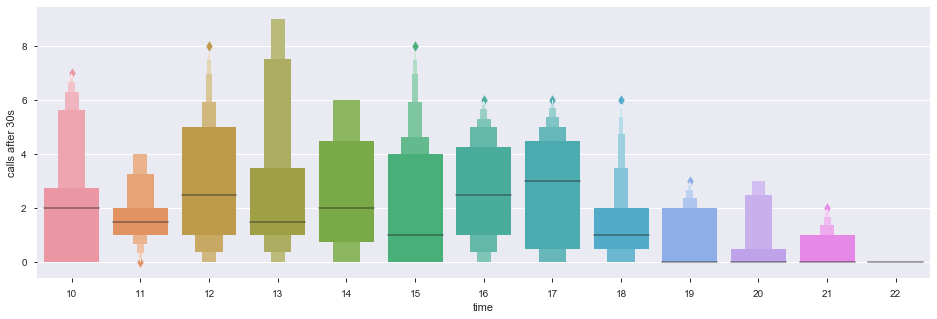

In [5]:
plt.figure(figsize=(16,5))
sns.boxenplot(data = tmp[tmp.date>'2019-11-05'], x = 'time', y = 'failure')
plt.ylabel('calls after 30s')

Text(0, 0.5, 'calls after 30s')

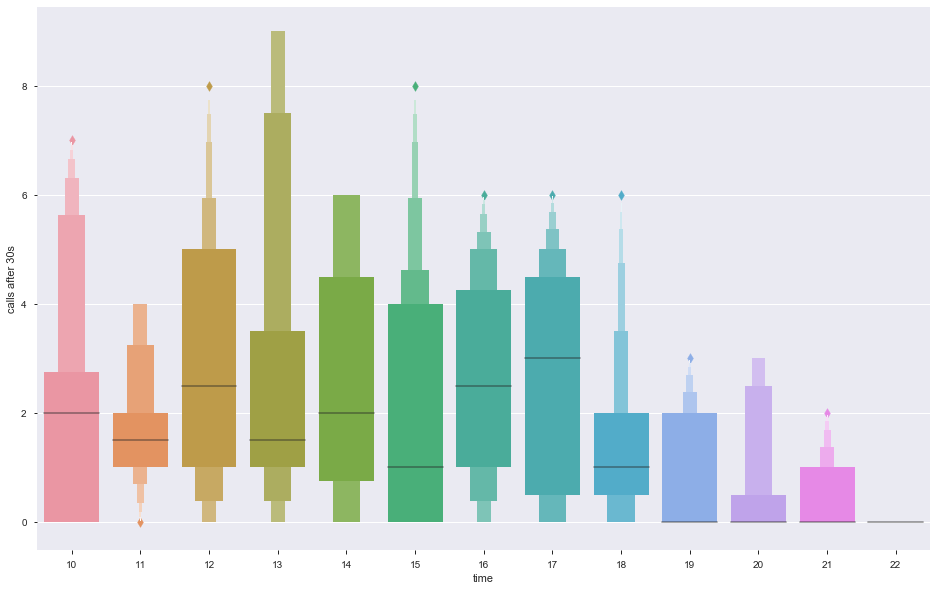

In [64]:
plt.figure(figsize=(16,10))
sns.boxenplot(data = tmp[tmp.date>'2019-11-05'], x = 'time', y = 'failure')
plt.ylabel('calls after 30s')

In [10]:
tmp = pd.read_excel(r'C:\Users\chpar10\Downloads\tmp.xlsx',sheet_name='Sheet9')

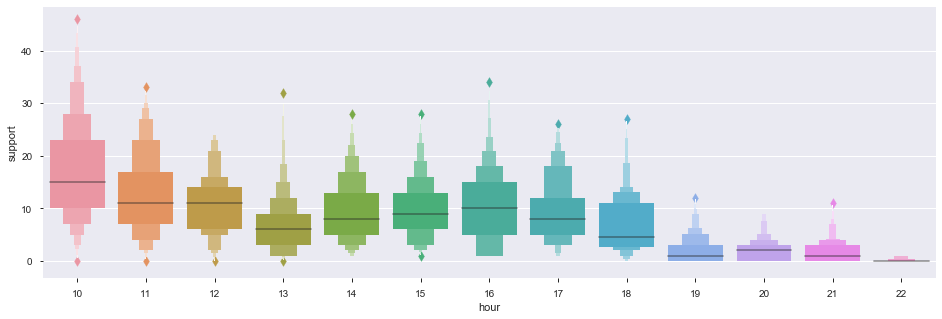

In [12]:
plt.figure(figsize=(16,5))
sns.boxenplot(data = tmp, x = 'hour', y = 'support')
#sns.boxenplot(data=tmp, x='hour', y='total')

In [13]:
tmp = pd.read_excel(r'C:\Users\chpar10\Downloads\tmp.xlsx',sheet_name='Sheet10')
tmp.head()

date  hour     type  call
0 2019-10-01    10  support    25
1 2019-10-01    11  support    21
2 2019-10-01    12  support    16
3 2019-10-01    13  support     5
4 2019-10-01    14  support    10

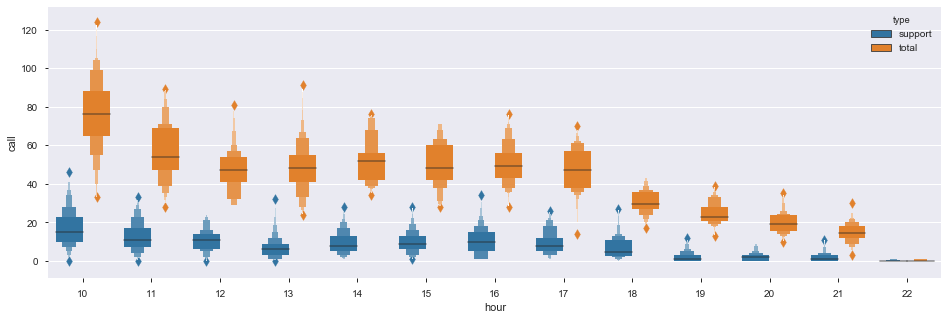

In [33]:
plt.figure(figsize=(16,5))
sns.boxenplot(data=tmp, x='hour', y='call', hue = 'type')

In [33]:
tmp = pd.read_excel(r'C:\Users\chpar10\Downloads\tmp.xlsx',sheet_name='Sheet7')

In [6]:
tmp[['svl', 'util']].corr()

svl      util
svl   1.000000 -0.174251
util -0.174251  1.000000

Text(0.5, 1.0, 'actual relationship (Feb.-Nov.)')

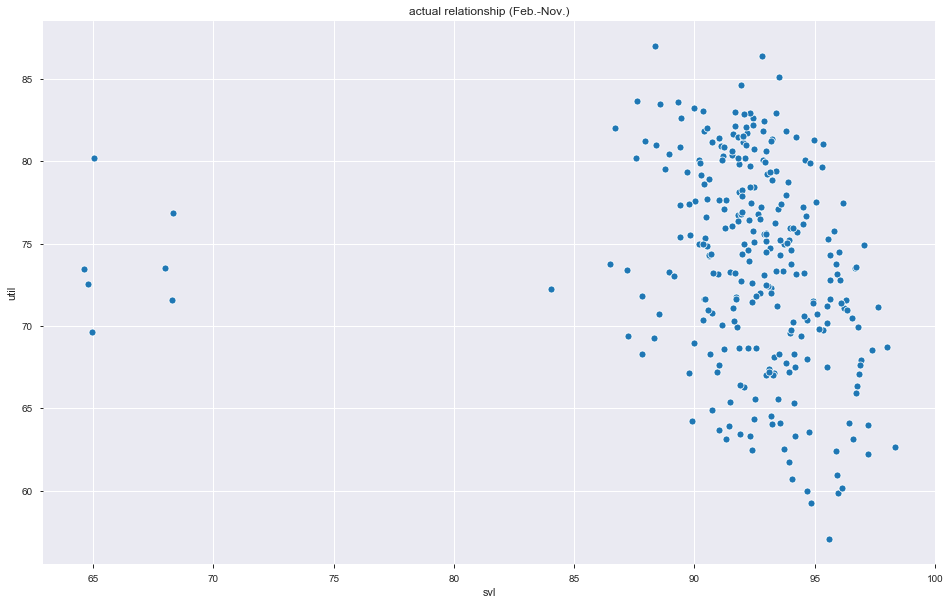

In [7]:
plt.figure(figsize=(16,10))
sns.scatterplot(data = tmp, x = 'svl', y = 'util')
plt.title('actual relationship (Feb.-Nov.)')

In [41]:
tmp[tmp.date>'2019-09-01'][['svl', 'share']].corr()
tmp[['svl', 'share']].corr()

svl    share
svl    1.00000 -0.15956
share -0.15956  1.00000

Text(0, 0.5, 'support')

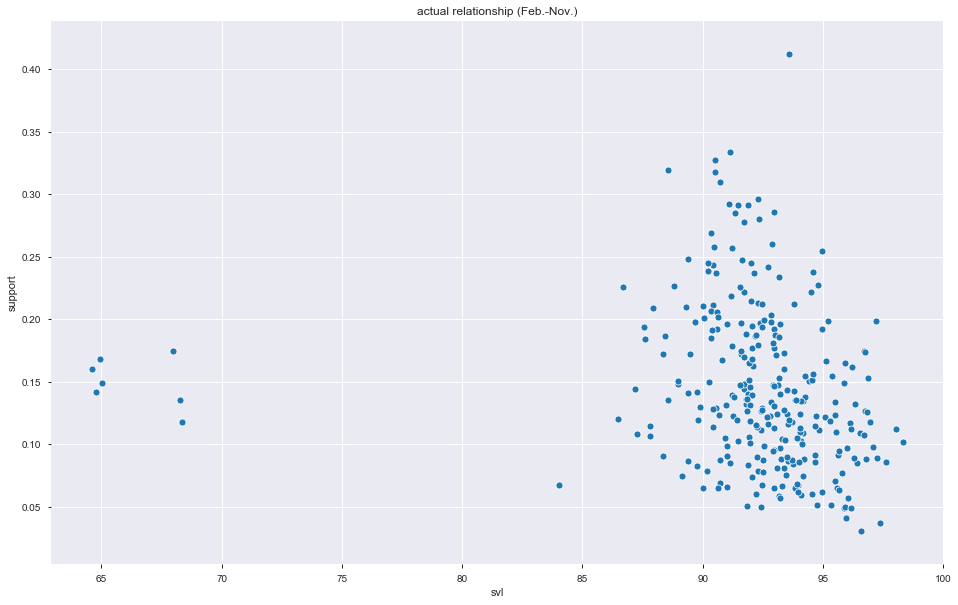

In [42]:
plt.figure(figsize=(16,10))
sns.scatterplot(data = tmp, x = 'svl', y = 'share')
plt.title('actual relationship (Feb.-Nov.)')
plt.ylabel('support')

In [10]:
deviation = [np.random.randn() for i in range(100)]

In [11]:
x = [i for i in range(55,90)]
x

[55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89]

In [31]:
dev=[]
for a, b in zip(x, deviation):
    dev.append(110-(1/a+5*b))

Text(0, 0.5, 'util')

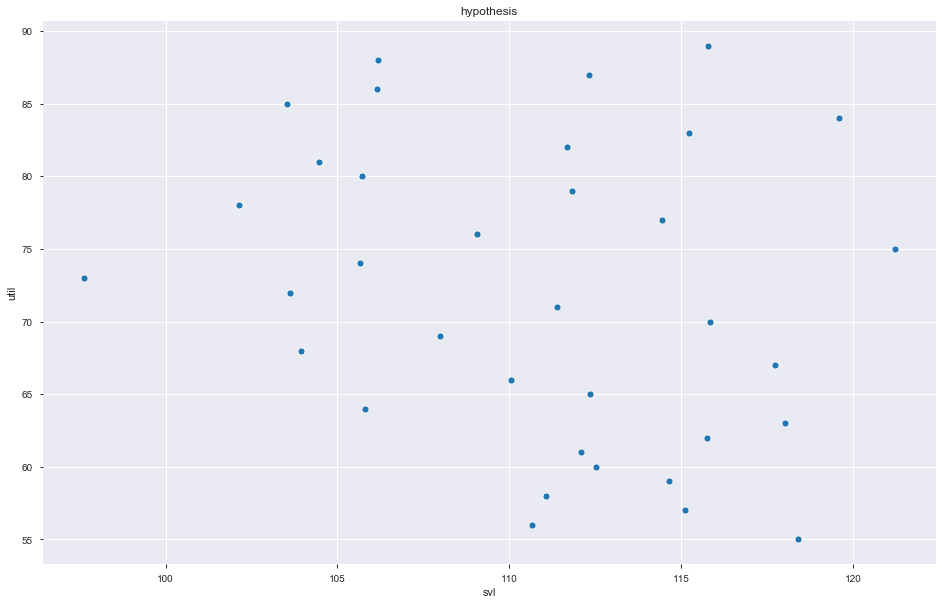

In [32]:
plt.figure(figsize=(16,10))
sns.scatterplot(x=dev, y=x)
plt.title('hypothesis')
plt.xlabel('svl')
plt.ylabel('util')

In [118]:
dev=[]
for a, b in zip(x, deviation):
    dev.append(np.log(a+1*b))

Text(0, 0.5, 'util')

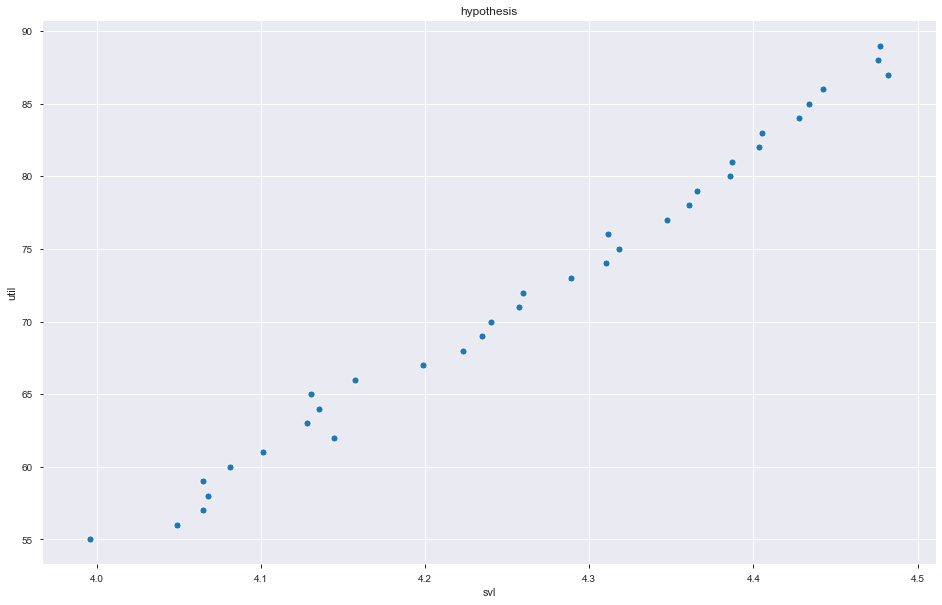

In [119]:
plt.figure(figsize=(16,10))
sns.scatterplot(x=dev, y=x)
plt.title('hypothesis')
plt.xlabel('svl')
plt.ylabel('util')

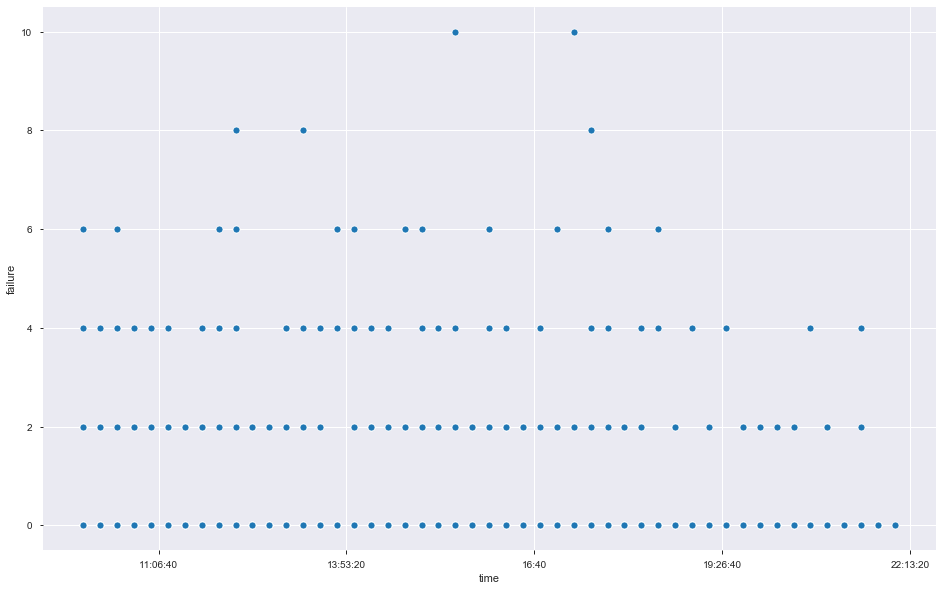

In [17]:
plt.figure(figsize=(16,10))
sns.scatterplot(data = tmp[tmp.date>'2019-11-05'], x = 'time', y = 'failure')

In [68]:
tmp.corr()

TalkTime     count      ATT      share
TalkTime  1.000000 -0.105662  0.178694 -0.105169
count    -0.105662  1.000000 -0.002938  0.960651
 ATT      0.178694 -0.002938  1.000000  0.008777
share    -0.105169  0.960651  0.008777  1.000000

In [69]:
test = {'wrapupcode':[], 'correlation':[] }

for wucode in tmp.Wrapupcode.unique():
    test['wrapupcode'].append(wucode)
    test['correlation'].append(tmp[tmp.Wrapupcode == wucode].corr().iloc[2,3].round(4))
    

In [70]:
tmp_df = pd.DataFrame(test)
tmp_df.sort_values(['correlation'], ascending = False)

wrapupcode  correlation
16         부가서비스(매장) - 변경/취소       0.2373
12             부가서비스 - 분실/파손       0.1996
0            CSC - SAC 상태 확인       0.1823
15              부가서비스 - 직원불만       0.1742
29               이커머스 - 주문변경       0.1645
4               교환/환불 - 단순변심       0.1462
1                  CSC SALES       0.1453
3           교환/환불 - 결제/판매 오류       0.1374
37                 제품 - 조립방법       0.1350
27               이커머스 - 제품문의       0.1153
5               교환/환불 - 제품하자       0.1022
11  매장 - 직원 및 사고, 서비스에 대한 의견       0.0865
10                 매장 - 일반문의       0.0612
36                 제품 - 제품문의       0.0529
8                  매장 - 결제관련       0.0451
26               이커머스 - 재고확인       0.0405
18          부가서비스(매장) - 일반문의       0.0374
6                    기타 - 기타       0.0285
19         아웃바운드 - IVR 결제 진행       0.0226
17         부가서비스(매장) - 상태 확인       0.0204
14                부가서비스 - 지연       0.0180
13              부가서비스 - 조립이슈       0.0011
38             제품 - 파트/부품 문의       0.0002
45             SCP - 구매 전 문의       0.0000
28        이커머스 - 주문/서비스 상태확인      -0.0025
30               이커머스 - 주문취소      -0.0062
21         이커머스 - 교환/환불-단순변심      -0.0111
40         주방욕실 - 상태 확인/변경문의      -0.0208
22         이커머스 - 교환/환불-제품하자      -0.0277
39           주방욕실 - 부가서비스 문의      -0.0457
33            이케아 - 회원 정보 관리      -0.0619
31            이케아 - HR 관련 문의      -0.0739
32          이케아 - 이벤트/마케팅 문의      -0.0776
41             주방욕실 - 설치 불만족      -0.0798
42               주방욕실 - 제품문의      -0.0867
7    기타 - 이전 상담원 연결요청/부재중 문의      -0.0880
2                         NS      -0.0906
43                패밀리 - 혜택문의      -0.0932
34                   제품 - 리콜      -0.0996
24           이커머스 - 부가서비스 문의      -0.1050
20              아웃바운드 - 컴플레인      -0.1150
23         이커머스 - 모바일/IRW 오류      -0.1251
44                패밀리 - 카탈로그      -0.1279
25               이커머스 - 쇼핑방법      -0.1461
47             SCP - 구매 후 문의      -0.1564
9                   매장 - 분실물      -0.2332
46              이케아 - 미디어 이슈      -0.2440
35                 제품 - 재고확인      -0.3090

In [106]:
top5 = [i for i in tmp_df.sort_values(['correlation'], ascending = False)['wrapupcode'][:5]]
bottom5 = [i for i in tmp_df.sort_values(['correlation'])['wrapupcode'][:5]]

In [113]:
idx = [i in bottom5 for i in tmp.Wrapupcode]
tmp[idx]

yymmdd     Wrapupcode  TalkTime  count   ATT   share
9     2019-08-01       매장 - 분실물       141     21    231  0.020
25    2019-08-01    이커머스 - 쇼핑방법       279     17    231  0.016
35    2019-08-01      제품 - 재고확인       198     57    231  0.055
53    2019-08-02       매장 - 분실물       129     33    235  0.031
69    2019-08-02    이커머스 - 쇼핑방법       249     19    235  0.018
77    2019-08-02      제품 - 재고확인       177     51    235  0.048
96    2019-08-03       매장 - 분실물       170     23    274  0.028
110   2019-08-03    이커머스 - 쇼핑방법       543      8    274  0.010
120   2019-08-03      제품 - 재고확인       194     22    274  0.026
137   2019-08-04       매장 - 분실물       180     39    233  0.048
152   2019-08-04    이커머스 - 쇼핑방법       276      7    233  0.009
160   2019-08-04      제품 - 재고확인       228     34    233  0.042
179   2019-08-05       매장 - 분실물       174     35    210  0.028
195   2019-08-05    이커머스 - 쇼핑방법       242     20    210  0.016
205   2019-08-05      제품 - 재고확인       186     65    210  0.051
223   2019-08-06       매장 - 분실물       146     20    229  0.019
239   2019-08-06    이커머스 - 쇼핑방법       295     13    229  0.012
248   2019-08-06      제품 - 재고확인       202     37    229  0.034
268   2019-08-07       매장 - 분실물       184     27    231  0.023
284   2019-08-07    이커머스 - 쇼핑방법       232     24    231  0.021
293   2019-08-07      제품 - 재고확인       177     46    231  0.040
312   2019-08-08       매장 - 분실물       140     33    231  0.029
328   2019-08-08    이커머스 - 쇼핑방법       414     18    231  0.016
336   2019-08-08      제품 - 재고확인       211     46    231  0.041
356   2019-08-09       매장 - 분실물       211     36    214  0.034
372   2019-08-09    이커머스 - 쇼핑방법       194     24    214  0.023
382   2019-08-09      제품 - 재고확인       194     46    214  0.043
401   2019-08-10       매장 - 분실물       174     34    227  0.037
417   2019-08-10    이커머스 - 쇼핑방법       252     17    227  0.019
427   2019-08-10      제품 - 재고확인       198     31    227  0.034
...          ...            ...       ...    ...    ...    ...
4027  2019-11-05       매장 - 분실물       232      9    304  0.009
4042  2019-11-05    이커머스 - 쇼핑방법       154     12    304  0.012
4051  2019-11-05      제품 - 재고확인       264     15    304  0.015
4070  2019-11-06       매장 - 분실물       236      4    265  0.004
4084  2019-11-06    이커머스 - 쇼핑방법       336      6    265  0.007
4094  2019-11-06      제품 - 재고확인       233     20    265  0.022
4106  2019-11-07  SCP - 구매 후 문의       313      1    243  0.001
4113  2019-11-07       매장 - 분실물       161      8    243  0.009
4125  2019-11-07    이커머스 - 쇼핑방법       355      9    243  0.010
4133  2019-11-07      제품 - 재고확인       213     20    243  0.022
4145  2019-11-08  SCP - 구매 후 문의       240      2    240  0.002
4152  2019-11-08       매장 - 분실물       213     10    240  0.012
4167  2019-11-08    이커머스 - 쇼핑방법       165      8    240  0.009
4176  2019-11-08      제품 - 재고확인       162     13    240  0.015
4187  2019-11-09  SCP - 구매 후 문의       148      1    221  0.001
4194  2019-11-09       매장 - 분실물       256      7    221  0.010
4208  2019-11-09    이커머스 - 쇼핑방법       117      6    221  0.008
4218  2019-11-09      제품 - 재고확인       281     10    221  0.014
4236  2019-11-10       매장 - 분실물       177     11    233  0.014
4252  2019-11-10    이커머스 - 쇼핑방법       260      4    233  0.005
4261  2019-11-10      제품 - 재고확인       205     11    233  0.014
4272  2019-11-11  SCP - 구매 후 문의       123      1    256  0.001
4279  2019-11-11       매장 - 분실물       161     21    256  0.017
4294  2019-11-11    이커머스 - 쇼핑방법       271     11    256  0.009
4302  2019-11-11      제품 - 재고확인       223     25    256  0.020
4321  2019-11-12       매장 - 분실물       106      5    222  0.005
4337  2019-11-12    이커머스 - 쇼핑방법       311     14    222  0.014
4346  2019-11-12      제품 - 재고확인       230     16    222  0.016
4375  2019-11-13    이커머스 - 쇼핑방법       254      2    236  0.012
4381  2019-11-13      제품 - 재고확인        92      2    236  0.012

[350 rows x 6 columns]

In [119]:
tmp.columns

Index(['yymmdd', 'Wrapupcode', 'TalkTime', 'count', ' ATT ', 'share'], dtype='object')

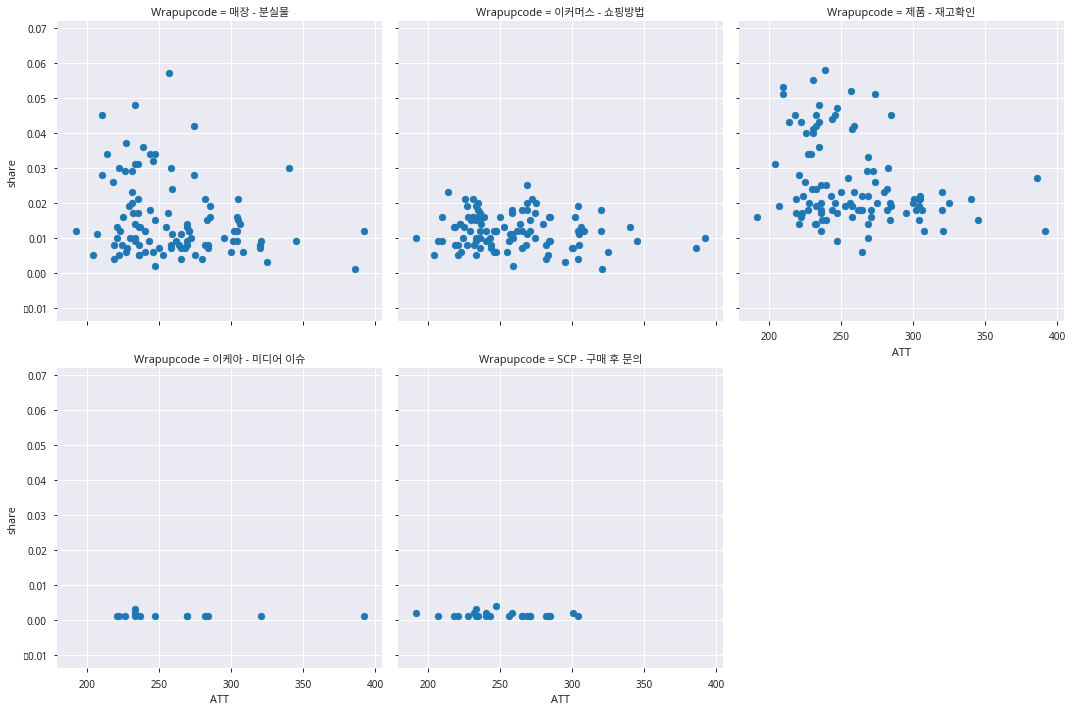

In [124]:
sns.FacetGrid(tmp[idx], col='Wrapupcode', col_wrap=3, height = 5).map(plt.scatter, ' ATT ', 'share')

In [93]:
tmp1 = tmp[tmp.Wrapupcode=="부가서비스(매장) - 변경/취소"]

yymmdd                Wrapupcode  TalkTime  count   ATT   share
0     2019-08-01           CSC - SAC 상태 확인       199      4    231  0.004
1     2019-08-01                 CSC SALES       479     17    231  0.016
2     2019-08-01                        NS       312     24    231  0.023
3     2019-08-01          교환/환불 - 결제/판매 오류       265     17    231  0.016
4     2019-08-01              교환/환불 - 단순변심       210     86    231  0.083
5     2019-08-01              교환/환불 - 제품하자       329     84    231  0.081
6     2019-08-01                   기타 - 기타       183     45    231  0.043
7     2019-08-01   기타 - 이전 상담원 연결요청/부재중 문의        66     23    231  0.022
8     2019-08-01                 매장 - 결제관련       148     10    231  0.010
9     2019-08-01                  매장 - 분실물       141     21    231  0.020
10    2019-08-01                 매장 - 일반문의       117     20    231  0.019
11    2019-08-01  매장 - 직원 및 사고, 서비스에 대한 의견       423      1    231  0.001
12    2019-08-01             부가서비스 - 분실/파손       305      4    231  0.004
13    2019-08-01              부가서비스 - 조립이슈       257      1    231  0.001
14    2019-08-01                부가서비스 - 지연        12      1    231  0.001
15    2019-08-01              부가서비스 - 직원불만       311      2    231  0.002
16    2019-08-01         부가서비스(매장) - 변경/취소       268     15    231  0.014
17    2019-08-01         부가서비스(매장) - 상태 확인       145     50    231  0.048
18    2019-08-01          부가서비스(매장) - 일반문의       146     51    231  0.049
19    2019-08-01         아웃바운드 - IVR 결제 진행       174     45    231  0.043
20    2019-08-01              아웃바운드 - 컴플레인       610     12    231  0.012
21    2019-08-01         이커머스 - 교환/환불-단순변심       265     15    231  0.014
22    2019-08-01         이커머스 - 교환/환불-제품하자       245     11    231  0.011
23    2019-08-01         이커머스 - 모바일/IRW 오류       160     38    231  0.037
24    2019-08-01           이커머스 - 부가서비스 문의       199     35    231  0.034
25    2019-08-01               이커머스 - 쇼핑방법       279     17    231  0.016
26    2019-08-01               이커머스 - 재고확인       156     10    231  0.010
27    2019-08-01               이커머스 - 제품문의       214      9    231  0.009
28    2019-08-01        이커머스 - 주문/서비스 상태확인       180     40    231  0.039
29    2019-08-01               이커머스 - 주문변경       199     34    231  0.033
...          ...                       ...       ...    ...    ...    ...
4358  2019-11-13                        NS        57      2    236  0.012
4359  2019-11-13          교환/환불 - 결제/판매 오류       183      1    236  0.006
4360  2019-11-13              교환/환불 - 단순변심       193     16    236  0.099
4361  2019-11-13              교환/환불 - 제품하자       444     15    236  0.093
4362  2019-11-13                   기타 - 기타       124      6    236  0.037
4363  2019-11-13                 매장 - 결제관련       166      2    236  0.012
4364  2019-11-13                 매장 - 일반문의        78      1    236  0.006
4365  2019-11-13  매장 - 직원 및 사고, 서비스에 대한 의견       213      3    236  0.019
4366  2019-11-13             부가서비스 - 분실/파손       267      1    236  0.006
4367  2019-11-13         부가서비스(매장) - 변경/취소       213      8    236  0.049
4368  2019-11-13         부가서비스(매장) - 상태 확인       157     10    236  0.062
4369  2019-11-13          부가서비스(매장) - 일반문의        95      4    236  0.025
4370  2019-11-13         아웃바운드 - IVR 결제 진행       117      4    236  0.025
4371  2019-11-13         이커머스 - 교환/환불-단순변심       359      7    236  0.043
4372  2019-11-13         이커머스 - 교환/환불-제품하자       264      5    236  0.031
4373  2019-11-13         이커머스 - 모바일/IRW 오류       364      4    236  0.025
4374  2019-11-13           이커머스 - 부가서비스 문의       184      6    236  0.037
4375  2019-11-13               이커머스 - 쇼핑방법       254      2    236  0.012
4376  2019-11-13        이커머스 - 주문/서비스 상태확인       121     10    236  0.062
4377  2019-11-13               이커머스 - 주문변경       328      4    236  0.025
4378  2019-11-13               이커머스 - 주문취소       312      6    236  0.037
4379  2019-11-13            이케아 - HR 관련 문의        82      1    236  0.006
4380  2019-11-

Text(0.5, 1.0, '"제품 - 재고확인" 문의 비중에 따른 ATT 변화 추이')

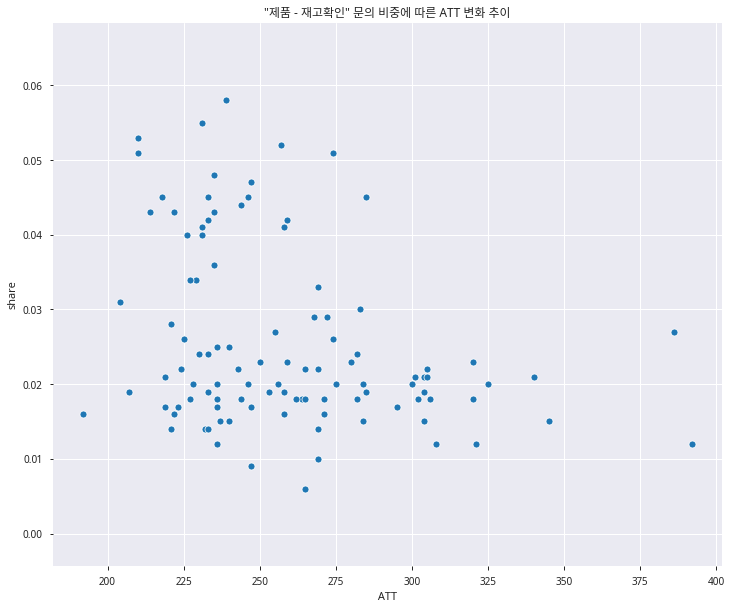

In [101]:
subject = "제품 - 재고확인"
plt.figure(figsize=(12,10))
sns.scatterplot(x=tmp[tmp.Wrapupcode==subject].iloc[:,4]
                , y=tmp[tmp.Wrapupcode==subject].iloc[:,5])
plt.title('"{}" 문의 비중에 따른 ATT 변화 추이'.format(subject))

Text(0.5, 1.0, '"부가서비스(매장) - 변경/취소" 문의 비중에 따른 ATT 변화 추이')

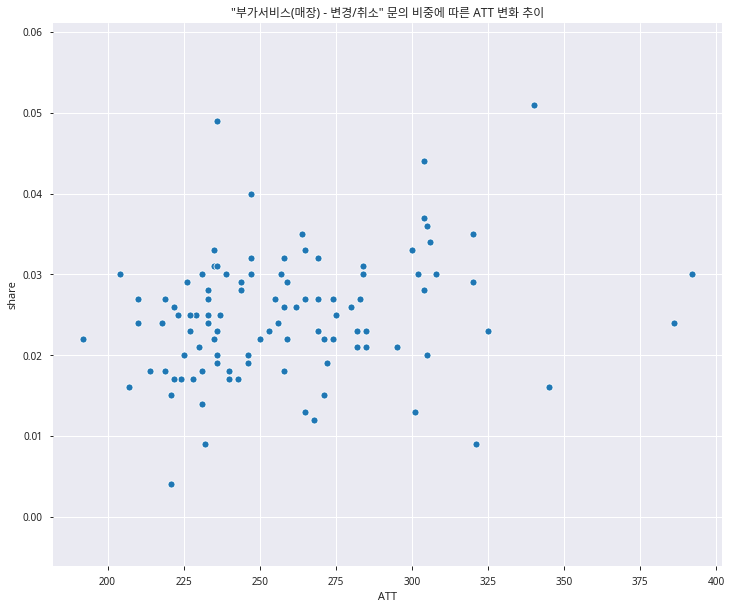

In [100]:
subject = "부가서비스(매장) - 변경/취소"
plt.figure(figsize=(12,10))
sns.scatterplot(x=tmp[tmp.Wrapupcode==subject].iloc[:,4]
                , y=tmp[tmp.Wrapupcode==subject].iloc[:,5])
plt.title('"{}" 문의 비중에 따른 ATT 변화 추이'.format(subject))

Text(7.235106866757617, 0.102, '7.24')

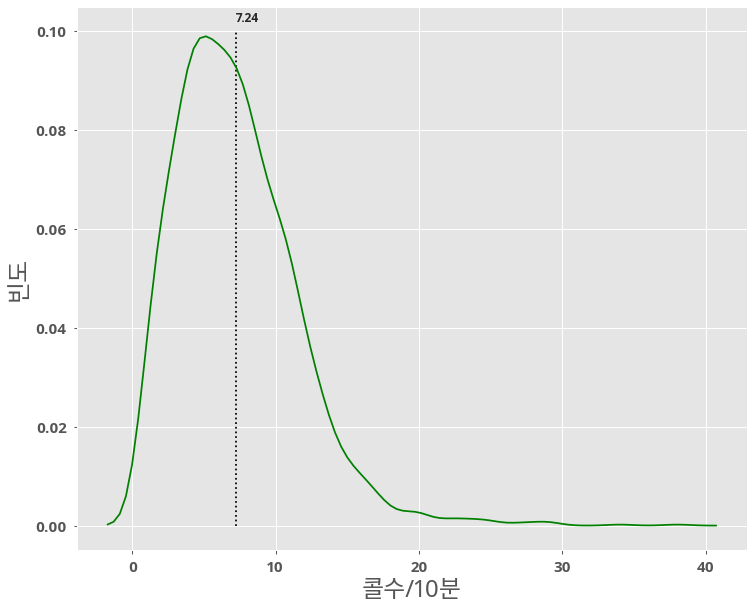

In [114]:

plt.figure(figsize=(12,10))
sns.distplot(tmp['count'], hist=False, color='green')
plt.vlines(x=np.mean(tmp['count']), ymin=0,ymax=0.1, linestyles='dotted')
plt.xlabel('콜수/10분')
plt.ylabel('빈도')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.text(s=round(np.mean(tmp['count']),2), x=np.mean(tmp['count']), y = 0.102, size=12, color = )

In [ ]:
pp.ProfileReport(tmp)

In [47]:
mean([1,2,3,4])

NameError: name 'mean' is not defined

In [4]:
import matplotlib.font_manager as fm

In [ ]:
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

# ttf 폰트 전체개수
print(len(font_list))

In [ ]:
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'IKEA' in f.name]

In [5]:
path = r'C:\\Windows\\Fonts\\NotoIKEAKorean-Regular.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
print(font_name)
plt.rc('font', family=font_name)

Noto IKEA Korean
